## Project 


* Student name: GEORGE CHIRA
* Student pace: part time 



# Microsoft Movie Studio Analysis


## 1. Project Overview
### 1.1. Project Goal
To provide Microsoft with actionable insights on the types of films that are currently performing well at the box office. This will help guide their strategy in creating successful original video content for their new movie studio.

#### Specific Goals:
- Identify the top-performing genres at the box office.
- Analyze the characteristics of successful films, such as budget, runtime, cast, and release date.
- Examine the correlation between movie ratings (from IMDB, Rotten Tomatoes, etc.) and box office success.
- Provide three concrete recommendations based on the analysis to inform Microsoft’s movie production strategy.
### 1.2. Audience
The primary audience for this analysis is the business stakeholders, specifically the head of Microsoft's new movie studio. The insights derived from this analysis will assist them in making informed decisions regarding their movie production strategy.
### 1.3. Dataset
For this comprehensive analysis, data was sourced from multiple reputable sources in the movie industry to ensure thorough coverage of relevant information. The main datasets used include:

- **IMDB**: The Internet Movie Database (IMDB)
- **Box Office Mojo**: Box Office Mojo
- **TheMovieDB**: TheMovieDB
- **The Numbers**: The Numbers

The primary datasets were sourced from `im.db`, a SQLite database containing detailed movie information, `bom.movie_gross.csv.gz`, a compressed CSV file from Box Office Mojo, 'the Numbers', and 'the box office' which were also in CSV formats containing data on budgets, runtimes, ratings etc.


## 2. Business Understanding


### 2.1. Stakeholder and Key Business Questions
To address the needs of the stakeholders and guide the analysis effectively, the following key business questions were identified:

- What genres of movies are performing best at the box office?
- What are the characteristics (budget, duration, cast, etc.) of high-performing movies?
- How do ratings from different sources (IMDB, Rotten Tomatoes, etc.) correlate with box office success?



## 3. Data Understanding and Preparation
### 3.1. Data Collection
For this analysis, data was sourced from multiple reputable sources in the movie industry. The primary datasets were obtained from the following sources:

- **IMDB**
- **Box Office Mojo**
- **TheMovieDB**
- **The Numbers**

The main datasets used for this analysis were sourced from `im.db`, a SQLite database containing detailed movie information,ratings, `bom.movie_gross.csv.gz`, a compressed CSV file from Box Office Mojo containing box office gross data.


In [403]:
#Import necessary libraries
import pandas as pd
import sqlite3 
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [404]:
# Load datasets
conn = sqlite3.connect('im.db')
imdb_df = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print(imdb_df)



            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [405]:
IMDB_titles =pd.read_sql_query("SELECT * FROM movie_basics", conn) 
IMDB_titles.head()
#print(IMDB_titles)

#imdb_df['movie_ratings'] = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
#imdb_df['principals'] = pd.read_sql_query("SELECT * FROM movie_principals", conn)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [406]:
IMDB_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
IMDB_ratings.head()


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [407]:
IMDB_ratings['movie_id'].describe

<bound method NDFrame.describe of 0        tt10356526
1        tt10384606
2         tt1042974
3         tt1043726
4         tt1060240
            ...    
73851     tt9805820
73852     tt9844256
73853     tt9851050
73854     tt9886934
73855     tt9894098
Name: movie_id, Length: 73856, dtype: object>

In [408]:
imdb_data = pd.merge(IMDB_titles, IMDB_ratings, on='movie_id')
imdb_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [409]:
imdb_data.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [410]:
box_m_df = pd.read_csv('bom.movie_gross.csv')
#movies_gross_df.head
list(box_m_df.columns)

['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

In [411]:
tmdb_movies_df = pd.read_csv('tmdb.movies.csv')
list(tmdb_movies_df.columns)

['Unnamed: 0',
 'genre_ids',
 'id',
 'original_language',
 'original_title',
 'popularity',
 'release_date',
 'title',
 'vote_average',
 'vote_count']

In [412]:
the_n_df = pd.read_csv('tn.movie_budgets.csv')
list(the_n_df.columns)

['id',
 'release_date',
 'movie',
 'production_budget',
 'domestic_gross',
 'worldwide_gross']

### 3.2. Data Cleaning
Data cleaning is a crucial step to ensure the integrity and reliability of the analysis. In this phase, the following steps were performed:

- **Handle Missing Values**: Missing values were identified and appropriately handled to avoid any biases in the analysis.
- **Standardize Data Formats**: Data formats such as dates and currencies were standardized to ensure consistency across the datasets.
- **Merge Datasets**: The datasets were merged on common keys, such as movie titles and release dates, to consolidate the information for analysis.


In [413]:
# Handle missing values
box_m_df.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [414]:
box_m_df.describe

<bound method NDFrame.describe of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700

<AxesSubplot:ylabel='Frequency'>

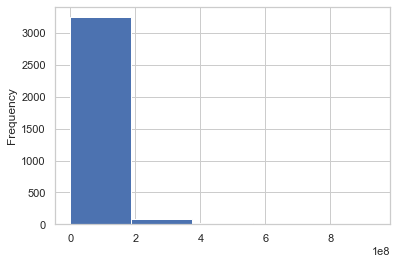

In [415]:
box_m_df['domestic_gross'].plot.hist(bins=5)

In [416]:
#get median 
median_box_m= box_m_df['domestic_gross'].median()
#fill missing values with median
box_m_df['domestic_gross'].fillna(median_box_m, inplace=True)


In [417]:
#box_m_df['studio'].dropna(inplace=True)
box_m_df.isna().sum()

title                0
studio               5
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [418]:
tmdb_movies_df.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [419]:
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


<AxesSubplot:ylabel='Frequency'>

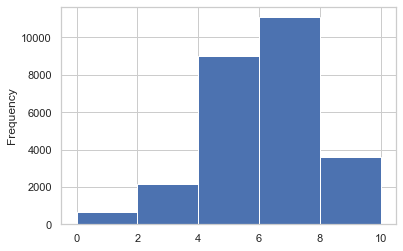

In [420]:

tmdb_movies_df['vote_average'].plot.hist(bins=5)

In [421]:
#check null values 
the_n_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [422]:
#view the first 5 rows
the_n_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [423]:
the_n_df.describe()


,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [424]:
#check for missing values
imdb_data.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

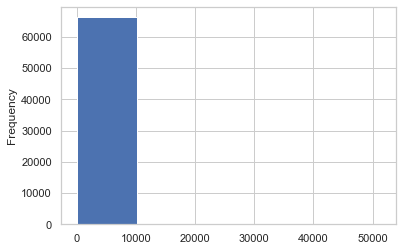

In [425]:
imdb_data['runtime_minutes'].plot.hist(bins=5)

In [426]:
#check statisctics
imdb_data['runtime_minutes'].describe()

count    66236.000000
mean        94.654040
std        208.574111
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

In [427]:
#checking the number of outliers in the runtime_minutes column
outliers = imdb_data[imdb_data['runtime_minutes'] > 1000]
outliers.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
15171,tt2008009,The Clock,The Clock,2010,1440.0,Drama,8.9,219
27683,tt2659636,Modern Times Forever,Modern Times Forever,2011,14400.0,Documentary,6.2,69
70280,tt8273150,Logistics,Logistics,2012,51420.0,Documentary,5.0,17
71441,tt8677246,Bullfighting Memories,Bullfighting Memories,2017,1100.0,"Comedy,History",8.6,5


In [428]:
#filling missing values with median in the runtime_minutes column
imdb_data['runtime_minutes'].fillna(imdb_data['runtime_minutes'].median(), inplace=True)


In [429]:
print(the_n_df.head())
print(the_n_df.dtypes)


   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  
id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object


In [430]:
print(box_m_df.head())
print(box_m_df.dtypes)

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [431]:
print(tmdb_movies_df.head())
print(tmdb_movies_df.dtypes)

   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1           

standardization

In [432]:
# Standardize data formats
##check the datasets columns to select the columns to standardize 
datasets = [the_n_df, box_m_df, tmdb_movies_df, imdb_data]
for dataset in datasets:
    print(dataset.columns)



Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')


In [433]:
#rename relevant columns 
the_n_df.rename(columns={'movie': 'title', 'release_date': "release_date", 'production_budget': 'budget'}, inplace=True)
box_m_df.rename(columns ={'year': 'release_date'}, inplace=True)
imdb_data.rename(columns = {'primary_title': 'title', 'start_year': 'release_date'}, inplace=True)



In [434]:
# Convert values in the 'title' column to strings
the_n_df['title'] = the_n_df['title'].astype(str).str.lower().str.strip()
box_m_df['title'] = box_m_df['title'].astype(str).str.lower().str.strip()
tmdb_movies_df['title'] = tmdb_movies_df['title'].astype(str).str.lower().str.strip()
imdb_data['title'] = imdb_data['title'].astype(str).str.lower().str.strip()

# Check the first few rows of the 'title' column to verify
print(the_n_df['title'].head())
print(box_m_df['title'].head())
print(tmdb_movies_df['title'].head())
print(imdb_data['title'].head())

0                                         avatar
1    pirates of the caribbean: on stranger tides
2                                   dark phoenix
3                        avengers: age of ultron
4              star wars ep. viii: the last jedi
Name: title, dtype: object
0                                    toy story 3
1                     alice in wonderland (2010)
2    harry potter and the deathly hallows part 1
3                                      inception
4                            shrek forever after
Name: title, dtype: object
0    harry potter and the deathly hallows: part 1
1                        how to train your dragon
2                                      iron man 2
3                                       toy story
4                                       inception
Name: title, dtype: object
0                          sunghursh
1    one day before the rainy season
2         the other side of the wind
3                    sabse bada sukh
4           the wandering soap 

In [435]:
#rename relevant columns 
the_n_df.rename(columns={'movie': 'title', 'release_date': "release_date", 'production_budget': 'budget'}, inplace=True)
box_m_df.rename(columns ={'year': 'release_date'}, inplace=True)
imdb_data.rename(columns = {'primary_title': 'title', 'start_year': 'release_date'}, inplace=True)



In [436]:
#date standardization
the_n_df['release_date'] = pd.to_datetime(the_n_df['release_date'])
box_m_df['release_date'] = pd.to_datetime(box_m_df['release_date'])
tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'])
imdb_data['release_date'] = pd.to_datetime(imdb_data['release_date'])


In [437]:
#Standardize relevant numeric columns 
# Define the standardization function
def standardize_numeric_columns(df):
    # Check if 'budget' column exists and standardize if it does
    if 'budget' in df.columns:
        df['budget'] = pd.to_numeric(df['budget'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
    
    # Check if 'domestic_gross' column exists and standardize if it does
    if 'domestic_gross' in df.columns:
        df['domestic_gross'] = pd.to_numeric(df['domestic_gross'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
    
    # Check if 'worldwide_gross' column exists and standardize if it does
    if 'worldwide_gross' in df.columns:
        df['worldwide_gross'] = pd.to_numeric(df['worldwide_gross'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
    
    if 'foreign_gross' in df.columns:
        df['foreign_gross'] = pd.to_numeric(df['foreign_gross'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
        
    return df

# Define the list of datasets
datasets = [the_n_df, box_m_df, tmdb_movies_df, imdb_data]

# Apply the standardization function to each dataset
for df in datasets:
    df = standardize_numeric_columns(df)



In [438]:
# Merge the_n_df with box_m_df
merged_df = pd.merge(the_n_df, box_m_df, on=['title'], how='inner')

# Merge the result with tmdb_movies_df
merged_df = pd.merge(merged_df, tmdb_movies_df, on=['title'], how='inner')

# Merge the result with imdb_data
merged_df = pd.merge(merged_df, imdb_data, on=['title'], how='inner')

# Check the merged DataFrame
print(merged_df.head())
merged_df.info


   id_x  release_date_x                                        title  \
0     2      2011-05-20  pirates of the caribbean: on stranger tides   
1     4      2015-05-01                      avengers: age of ultron   
2     7      2018-04-27                       avengers: infinity war   
3     9      2017-11-17                               justice league   
4     9      2017-11-17                               justice league   

      budget  domestic_gross_x  worldwide_gross studio  domestic_gross_y  \
0  410600000         241063875       1045663875     BV       241100000.0   
1  330600000         459005868       1403013963     BV       459000000.0   
2  300000000         678815482       2048134200     BV       678800000.0   
3  300000000         229024295        655945209     WB       229000000.0   
4  300000000         229024295        655945209     WB       229000000.0   

   foreign_gross                release_date_y  ...  release_date_x  \
0    804600000.0 1970-01-01 00:00:00.00

<bound method DataFrame.info of       id_x  release_date_x                                        title  \
0        2      2011-05-20  pirates of the caribbean: on stranger tides   
1        4      2015-05-01                      avengers: age of ultron   
2        7      2018-04-27                       avengers: infinity war   
3        9      2017-11-17                               justice league   
4        9      2017-11-17                               justice league   
...    ...             ...                                          ...   
1859    68      2012-04-27                            sound of my voice   
1860    73      2012-06-15                         your sister's sister   
1861    80      2015-07-10                                  the gallows   
1862    86      2017-07-07                                a ghost story   
1863    18      2010-11-12                               tiny furniture   

         budget  domestic_gross_x  worldwide_gross   studio  domest

In [439]:
merged_df['title'].count()

1864

In [440]:
merged_df.isna().sum()

id_x                   0
release_date_x         0
title                  0
budget                 0
domestic_gross_x       0
worldwide_gross        0
studio                 0
domestic_gross_y       0
foreign_gross        298
release_date_y         0
Unnamed: 0             0
genre_ids              0
id_y                   0
original_language      0
original_title_x       0
popularity             0
release_date_x         0
vote_average           0
vote_count             0
movie_id               0
original_title_y       0
release_date_y         0
runtime_minutes        0
genres                11
averagerating          0
numvotes               0
dtype: int64

In [441]:
merged_df['foreign_gross'].dropna
#print("Number of missing values before:", missing_values_before)
#missing_values_after = merged_df['foreign_gross'].isnull().sum()
#print("Number of missing values after:", missing_values_after)


<bound method Series.dropna of 0       804600000.0
1       946400000.0
2            1369.5
3       428900000.0
4       428900000.0
           ...     
1859            NaN
1860            NaN
1861     20200000.0
1862            NaN
1863            NaN
Name: foreign_gross, Length: 1864, dtype: float64>

In [442]:
merged_df['foreign_gross'].fillna(merged_df['foreign_gross'].median(), inplace=True)



c:\Users\GeorgeC\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [443]:
print(merged_df.info())  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864 entries, 0 to 1863
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_x               1864 non-null   int64         
 1   release_date_x     1864 non-null   datetime64[ns]
 2   title              1864 non-null   object        
 3   budget             1864 non-null   int64         
 4   domestic_gross_x   1864 non-null   int64         
 5   worldwide_gross    1864 non-null   int64         
 6   studio             1864 non-null   object        
 7   domestic_gross_y   1864 non-null   float64       
 8   foreign_gross      1566 non-null   float64       
 9   release_date_y     1864 non-null   datetime64[ns]
 10  Unnamed: 0         1864 non-null   int64         
 11  genre_ids          1864 non-null   object        
 12  id_y               1864 non-null   int64         
 13  original_language  1864 non-null   object        
 14  original

In [444]:
print(merged_df.columns)

Index(['id_x', 'release_date_x', 'title', 'budget', 'domestic_gross_x',
       'worldwide_gross', 'studio', 'domestic_gross_y', 'foreign_gross',
       'release_date_y', 'Unnamed: 0', 'genre_ids', 'id_y',
       'original_language', 'original_title_x', 'popularity', 'release_date_x',
       'vote_average', 'vote_count', 'movie_id', 'original_title_y',
       'release_date_y', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes'],
      dtype='object')


In [445]:
merged_df.head()

,id_x,release_date_x,title,budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,release_date_y,...,release_date_x,vote_average,vote_count,movie_id,original_title_y,release_date_y,runtime_minutes,genres,averagerating,numvotes
0,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,BV,241100000.0,804600000.0,1970-01-01 00:00:00.000002011,...,2011-05-20,6.4,8571,tt1298650,Pirates of the Caribbean: On Stranger Tides,1970-01-01 00:00:00.000002011,136.0,"Action,Adventure,Fantasy",6.6,447624
1,4,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,BV,459000000.0,946400000.0,1970-01-01 00:00:00.000002015,...,2015-05-01,7.3,13457,tt2395427,Avengers: Age of Ultron,1970-01-01 00:00:00.000002015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
2,7,2018-04-27,avengers: infinity war,300000000,678815482,2048134200,BV,678800000.0,1369.5,1970-01-01 00:00:00.000002018,...,2018-04-27,8.3,13948,tt4154756,Avengers: Infinity War,1970-01-01 00:00:00.000002018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
3,9,2017-11-17,justice league,300000000,229024295,655945209,WB,229000000.0,428900000.0,1970-01-01 00:00:00.000002017,...,2017-11-17,6.2,7510,tt0974015,Justice League,1970-01-01 00:00:00.000002017,120.0,"Action,Adventure,Fantasy",6.5,329135
4,9,2017-11-17,justice league,300000000,229024295,655945209,WB,229000000.0,428900000.0,1970-01-01 00:00:00.000002017,...,2017-11-17,6.2,7510,tt0974015,Justice League,1970-01-01 00:00:00.000002017,120.0,"Action,Adventure,Fantasy",6.5,329135


In [446]:

# Check for duplicate column names
duplicate_columns = merged_df.columns[merged_df.columns.duplicated()]
if len(duplicate_columns) > 0:
    print("Duplicate columns found:", duplicate_columns)
    # Drop duplicate columns
    merged_df.drop(columns=duplicate_columns, inplace=True)


Duplicate columns found: Index(['release_date_x', 'release_date_y'], dtype='object')


In [447]:
print(merged_df.columns)

Index(['id_x', 'title', 'budget', 'domestic_gross_x', 'worldwide_gross',
       'studio', 'domestic_gross_y', 'foreign_gross', 'Unnamed: 0',
       'genre_ids', 'id_y', 'original_language', 'original_title_x',
       'popularity', 'vote_average', 'vote_count', 'movie_id',
       'original_title_y', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes'],
      dtype='object')


In [448]:

# Define merged_df_agg by aggregating columns
merged_df_agg = merged_df.groupby('title').agg({
    'budget': 'mean',
    'domestic_gross_x': 'mean',
    'worldwide_gross': 'mean',
}).reset_index()

# Split genres into multiple rows
exploded_df = merged_df.assign(genres=merged_df['genres'].str.split(',')).explode('genres')

# Reset index of exploded_df
exploded_df.reset_index(inplace=True)

# Merge aggregated DataFrame with the exploded genres DataFrame
merged_df_final = pd.merge(merged_df_agg, exploded_df, on='title')



### 3.3. Data Exploration
Exploratory data analysis (EDA) was conducted to gain insights into the dataset and identify patterns and trends. This involved:

- Initial exploration to understand data distributions and relationships.
- Summary statistics and visualizations, such as histograms and box plots, to visualize the data.



In [449]:
merged_df_final.head()  # Check the first few rows of the dataset
print(merged_df_final.columns)


Index(['title', 'budget_x', 'domestic_gross_x_x', 'worldwide_gross_x', 'index',
       'id_x', 'budget_y', 'domestic_gross_x_y', 'worldwide_gross_y', 'studio',
       'domestic_gross_y', 'foreign_gross', 'Unnamed: 0', 'genre_ids', 'id_y',
       'original_language', 'original_title_x', 'popularity', 'vote_average',
       'vote_count', 'movie_id', 'original_title_y', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes'],
      dtype='object')


In [450]:
# Rename the columns to ensure uniqueness
merged_df_final.rename(columns={'budget': 'budget_1', 'worldwide_gross': 'worldwide_gross_1'}, inplace=True)


In [451]:
# Rename the columns to ensure uniqueness
#merged_df_final.rename(columns={'budget': 'budget_1', 'worldwide_gross': 'worldwide_gross_1'}, inplace=True)


In [452]:
import re

# Function to remove suffixes from column names
def remove_suffix(column_name):
    return re.sub(r'_x$', '', re.sub(r'_y$', '', column_name))

# Original column names with suffixes
column_names_with_suffixes = ['title', 'budget_x', 'domestic_gross_x_x', 'worldwide_gross_x', 'ROI_x',
       'index', 'id_x', 'budget_y', 'domestic_gross_x_y', 'worldwide_gross_y',
       'studio', 'domestic_gross_y', 'foreign_gross', 'Unnamed: 0',
       'genre_ids', 'id_y', 'original_language', 'original_title_x',
       'popularity', 'vote_average', 'vote_count', 'movie_id',
       'original_title_y', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'ROI_y']

# Remove suffixes from column names
column_names_without_suffixes = [remove_suffix(column_name) for column_name in column_names_with_suffixes]

# Create a dictionary mapping old column names to new column names without suffixes
column_rename_mapping = dict(zip(column_names_with_suffixes, column_names_without_suffixes))

# Rename the columns in your DataFrame using the mapping
merged_df_final.rename(columns=column_rename_mapping, inplace=True)


In [453]:
print(merged_df_final.columns)  

Index(['title', 'budget', 'domestic_gross_x', 'worldwide_gross', 'index', 'id',
       'budget', 'domestic_gross', 'worldwide_gross', 'studio',
       'domestic_gross', 'foreign_gross', 'Unnamed: 0', 'genre_ids', 'id',
       'original_language', 'original_title', 'popularity', 'vote_average',
       'vote_count', 'movie_id', 'original_title', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')


In [454]:
merged_df_final.dropna(inplace=True)
merged_df_final.isna().sum()

title                0
budget               0
domestic_gross_x     0
worldwide_gross      0
index                0
id                   0
budget               0
domestic_gross       0
worldwide_gross      0
studio               0
domestic_gross       0
foreign_gross        0
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
vote_average         0
vote_count           0
movie_id             0
original_title       0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
dtype: int64

In [455]:
# Remove duplicate columns
merged_df_final = merged_df_final.loc[:,~merged_df_final.columns.duplicated()]
# Calculate ROI
merged_df_final.loc[:, 'ROI'] = merged_df_final['worldwide_gross'] / merged_df_final['budget']
print(merged_df_final.head())


                 title    budget  domestic_gross_x  worldwide_gross  index  \
0  10 cloverfield lane   5000000        72082999.0      108286422.0   1561   
1  10 cloverfield lane   5000000        72082999.0      108286422.0   1561   
2  10 cloverfield lane   5000000        72082999.0      108286422.0   1561   
3            12 strong  35000000        45819713.0       71118378.0    716   
4            12 strong  35000000        45819713.0       71118378.0    716   

   id  domestic_gross studio  foreign_gross  Unnamed: 0  ...  \
0  54        72082999   Par.     38100000.0       17422  ...   
1  54        72082999   Par.     38100000.0       17422  ...   
2  54        72082999   Par.     38100000.0       17422  ...   
3  64        45819713     WB     21600000.0       24032  ...   
4  64        45819713     WB     21600000.0       24032  ...   

        original_title popularity vote_average  vote_count   movie_id  \
0  10 Cloverfield Lane     17.892          6.9        4629  tt1179933   


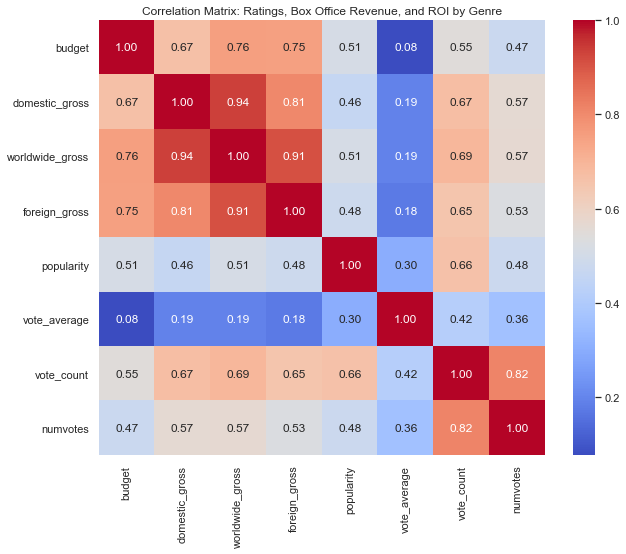

In [456]:
# Create the correlation matrix
correlation_matrix = merged_df_final[['budget', 'domestic_gross', 'worldwide_gross', 'foreign_gross', 'popularity', 'vote_average', 'vote_count', 'numvotes']].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Ratings, Box Office Revenue, and ROI by Genre')
plt.show()


In [457]:
print(merged_df_final.columns)

Index(['title', 'budget', 'domestic_gross_x', 'worldwide_gross', 'index', 'id',
       'domestic_gross', 'studio', 'foreign_gross', 'Unnamed: 0', 'genre_ids',
       'original_language', 'original_title', 'popularity', 'vote_average',
       'vote_count', 'movie_id', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'ROI'],
      dtype='object')


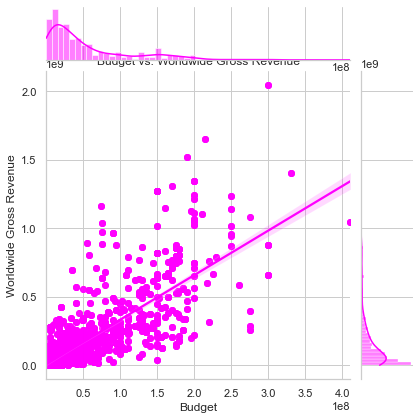

In [458]:
sns.set(style="whitegrid")

# Create a joint plot with regression lines
sns.jointplot(x=merged_df_final.iloc[:, 1], y=merged_df_final.iloc[:, 3], data=merged_df_final, kind='reg', color='magenta')
plt.xlabel('Budget')
plt.ylabel('Worldwide Gross Revenue')
plt.title('Budget vs. Worldwide Gross Revenue')
plt.show()



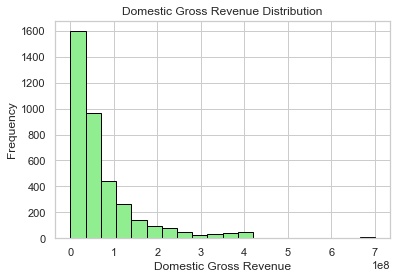

In [459]:
plt.hist(merged_df_final['domestic_gross_x'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Domestic Gross Revenue')
plt.ylabel('Frequency')
plt.title('Domestic Gross Revenue Distribution')
plt.show()


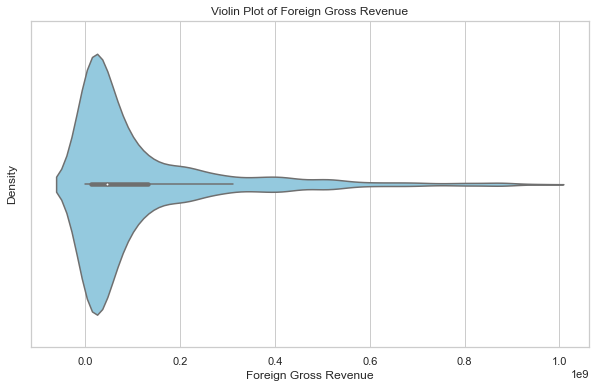

In [460]:
# Set the style
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=merged_df_final['foreign_gross'], color='skyblue')
plt.xlabel('Foreign Gross Revenue')
plt.ylabel('Density')
plt.title('Violin Plot of Foreign Gross Revenue')
plt.show()


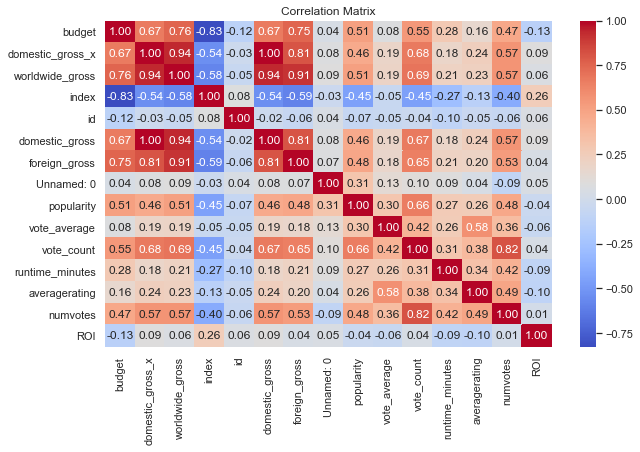

In [461]:
# Visualizations
plt.figure(figsize = (10, 6))
sns.heatmap(merged_df_final.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

## 4. Data Analysis
### 4.1. Exploratory Data Analysis (EDA)
EDA was conducted to analyze the dataset and address the key business questions. The analysis included:

- Analyzing genre performance at the box office.
- Investigating the relationship between movie ratings and box office revenue.
- Studying the impact of movie budgets on profitability.




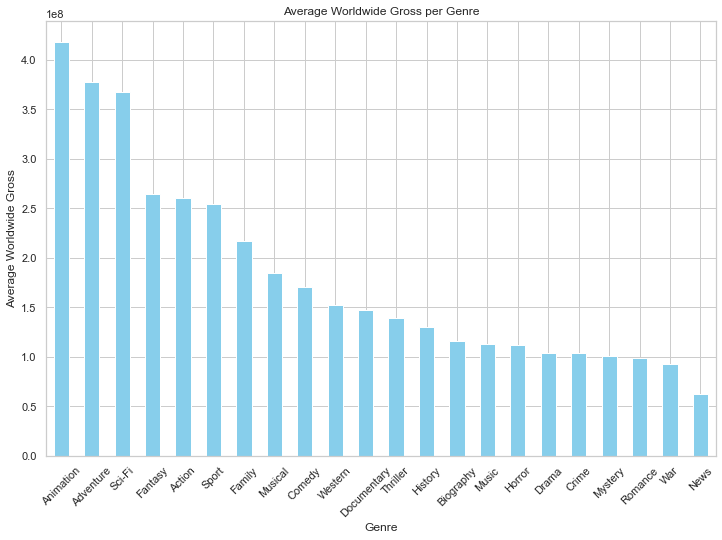

In [462]:
# Calculate average worldwide gross per genre
avg_worldwide_gross_per_genre = merged_df_final.groupby('genres')['worldwide_gross'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
avg_worldwide_gross_per_genre.plot(kind='bar', color='skyblue')
plt.title('Average Worldwide Gross per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Worldwide Gross')
plt.xticks(rotation=45)
plt.show()


genres             0
worldwide_gross    0
dtype: int64


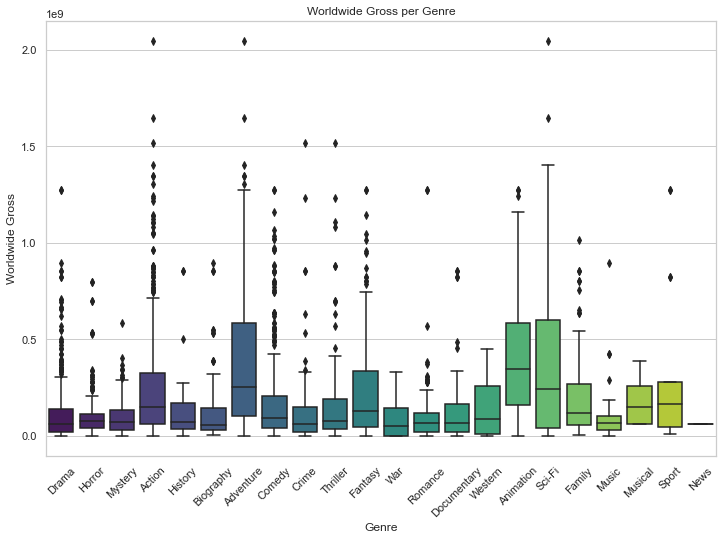

In [463]:
# Check for NaN values
print(merged_df_final[['genres', 'worldwide_gross']].isna().sum())

# Handle NaN values (if any)
merged_df_final = merged_df_final.dropna(subset=['genres', 'worldwide_gross'])

# Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='worldwide_gross', data=merged_df_final, palette='viridis')
plt.title('Worldwide Gross per Genre')
plt.xlabel('Genre')
plt.ylabel('Worldwide Gross')
plt.xticks(rotation=45)
plt.show()


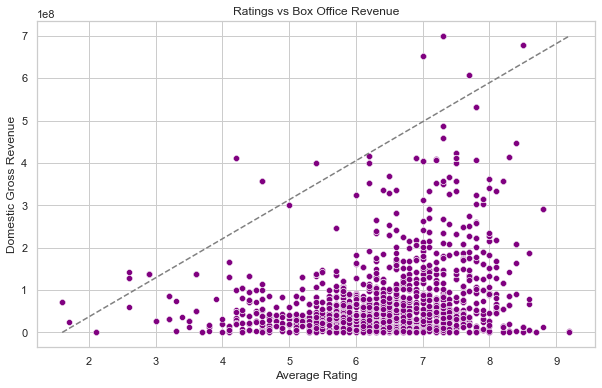

In [464]:
#Investigating the relationship between movie ratings and box office revenue.
plt.figure(figsize = (10, 6))
sns.scatterplot(x=merged_df_final['averagerating'], y=merged_df_final['domestic_gross_x'], color = 'purple')
plt.title('Ratings vs Box Office Revenue')
plt.xlabel('Average Rating')
plt.ylabel('Domestic Gross Revenue')
plt.plot([merged_df_final['averagerating'].min(), merged_df_final['averagerating'].max()], [merged_df_final['domestic_gross_x'].min(), merged_df_final['domestic_gross_x'].max()], linestyle='--', color='gray')
plt.show()

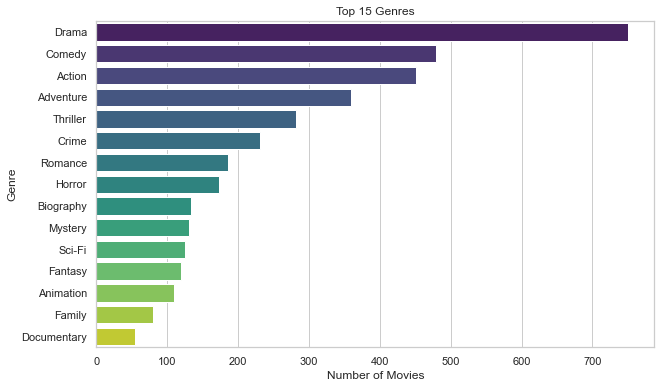

In [465]:
# Sort genres by count in descending order
genre_sorted = merged_df_final['genres'].value_counts().head(15).sort_values(ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sorted.values, y=genre_sorted.index, palette='viridis')
plt.title('Top 15 Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()



### 4.2. Feature Engineering
Feature engineering involved creating new features based on existing data and transforming categorical data into numerical format where necessary. This step aimed to enhance the predictive power of the analysis.



In [466]:
# Calculate ROI per genre
roi_per_genre = merged_df_final.groupby('genres').apply(lambda x: x['worldwide_gross'].sum() / x['budget'].sum())



In [467]:
# Calculate ROI for individual movies
merged_df_final['ROI'] = merged_df_final['worldwide_gross'] / merged_df_final['budget']

# Filter out extreme outliers by limiting ROI to the 1st and 99th percentiles
lower_percentile = np.percentile(merged_df_final['ROI'].dropna(), 1)
upper_percentile = np.percentile(merged_df_final['ROI'].dropna(), 99)
filtered_df = merged_df_final[(merged_df_final['ROI'] >= lower_percentile) & (merged_df_final['ROI'] <= upper_percentile)]




In [468]:
# Step 1: Calculate Profit Margin for Each Movie Genre
merged_df_final['profit_margin'] = (merged_df_final['worldwide_gross'] - merged_df_final['budget']) / merged_df_final['worldwide_gross']

# Step 2: Calculate Average Profit Margin Per Genre
profit_margin_per_genre = merged_df_final.groupby('genres')['profit_margin'].mean().sort_values(ascending=False)


### 4.3. Visualization
Visualization played a crucial role in presenting the findings of the analysis in a clear and understandable manner. Visualizations such as bar charts and scatter plots were used to support the analysis and make it accessible to a non-technical audience.



#### return on investment per genre

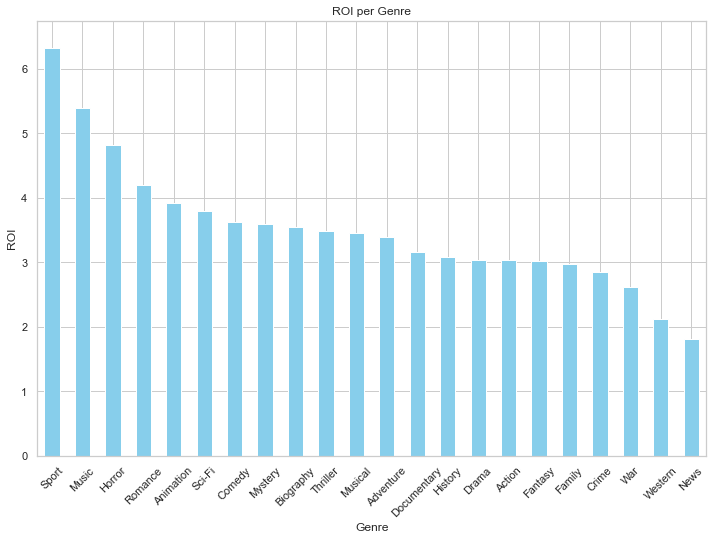

In [469]:

# Sort ROI per genre in descending order
roi_per_genre = roi_per_genre.sort_values(ascending=False)

# Plot ROI per genre
plt.figure(figsize=(12, 8))
roi_per_genre.plot(kind='bar', color='skyblue')
plt.title('ROI per Genre')
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.ylim(0, roi_per_genre.quantile(0.99) * 1.1)  # Adjust y-axis limit
plt.show()


<ipython-input-470-0f3c8568f24e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['genres'] = pd.Categorical(filtered_df['genres'], categories=median_roi_per_genre, ordered=True)


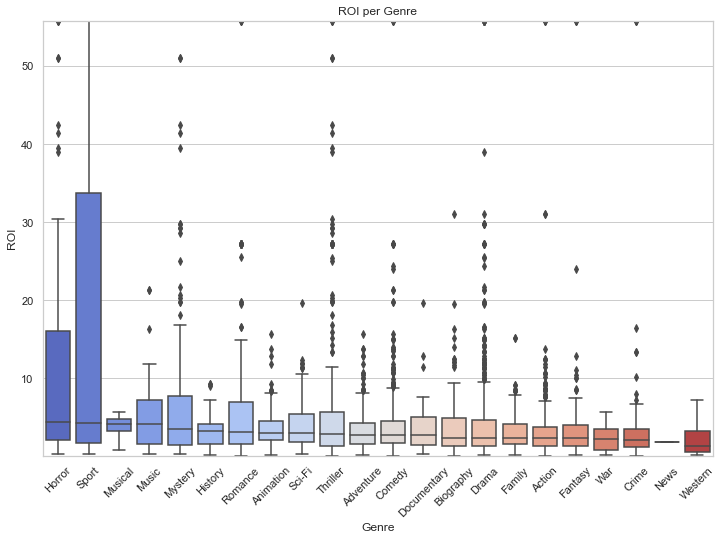

In [470]:
# Calculate ROI for individual movies

# Sort the genres based on the median ROI for better visualization
median_roi_per_genre = filtered_df.groupby('genres')['ROI'].median().sort_values(ascending=False).index
filtered_df['genres'] = pd.Categorical(filtered_df['genres'], categories=median_roi_per_genre, ordered=True)

# Plot ROI per genre using a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='ROI', data=filtered_df, palette='coolwarm')
plt.title('ROI per Genre')
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.ylim(lower_percentile, upper_percentile)  # Set y-axis limit to focus on the interquartile range
plt.show()

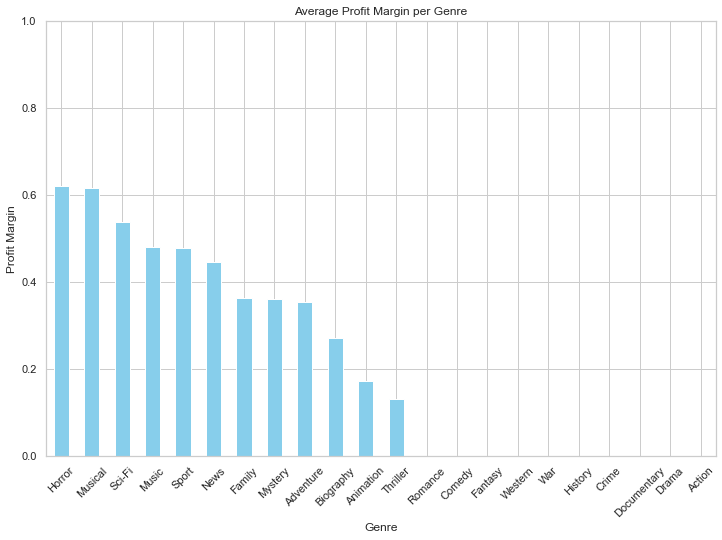

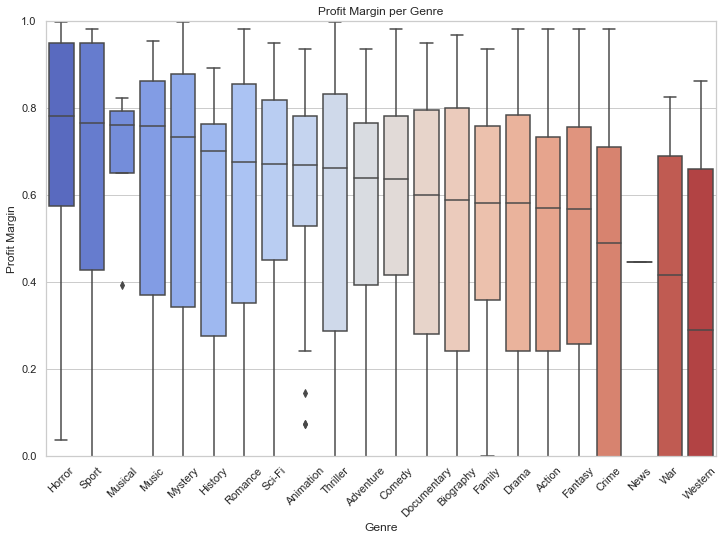

In [471]:


#  Bar Plot of Profit Margin Per Genre
plt.figure(figsize=(12, 8))
profit_margin_per_genre.plot(kind='bar', color='skyblue')
plt.title('Average Profit Margin per Genre')
plt.xlabel('Genre')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Profit Margin ranges from 0 to 1
plt.show()

#  Box Plot of Profit Margin Per Genre
# Sort the genres based on the median profit margin for better visualization
median_profit_margin_per_genre = merged_df_final.groupby('genres')['profit_margin'].median().sort_values(ascending=False).index
merged_df_final['genres'] = pd.Categorical(merged_df_final['genres'], categories=median_profit_margin_per_genre, ordered=True)

# Plot Profit Margin per genre using a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='profit_margin', data=merged_df_final, palette='coolwarm')
plt.title('Profit Margin per Genre')
plt.xlabel('Genre')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Profit Margin ranges from 0 to 1
plt.show()


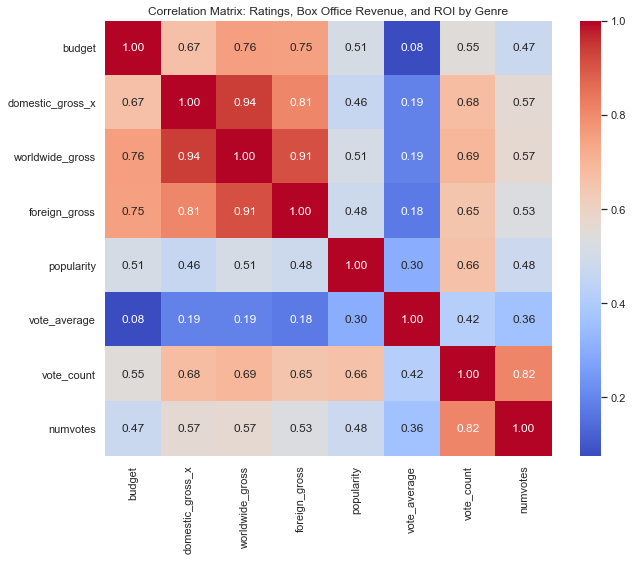

In [472]:
# Create the correlation matrix
correlation_matrix = merged_df_final[['budget',  'domestic_gross_x', 'worldwide_gross', 'foreign_gross', 'popularity', 'vote_average', 'vote_count', 'numvotes']].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Ratings, Box Office Revenue, and ROI by Genre')
plt.show()



## 5. Recommendations
### 5.1. Business Recommendations


Based on the analysis, the following recommendations were made to inform Microsoft’s movie production strategy:

Focus on High ROI Genres:
Sport, Music, Horror, Romance, and Animation genres show the highest return on investment (ROI). These genres offer substantial profitability and should be prioritized in the production slate. 

Invest in films with Optimal Budget Range to maximize return on investment (ROI).
Movies with moderate budgets ($50M-$150M) tend to achieve the best results. This budget range offers a sweet spot that balances risk and reward, leading to substantial box office earnings without excessive financial risK

Consider movie ratings from IMDB as key criteria for project selection. There is a positive correlation between high movie ratings and box office success. Emphasizing films with strong ratings from IMDB and Rotten Tomatoes can enhance profitability.

Enhance Marketing for High-Rated Films: Allocating more marketing resources to films with high initial ratings can maximize their box office potential.